# Case Study #7
<hr>

In [17]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
# reading the dataset
iris_df = pd.read_excel('Datasets/iris.xls')
iris_df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
iris_df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
r, c = iris_df.shape
print(f'No. of Rows: {r}\nNo. of Columns/Features: {c}')

No. of Rows: 150
No. of Columns/Features: 5


In [21]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 1. Pre-processing

First let's check whether the dataset contains any missing values.

In [22]:
iris_df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are some missing values in **SL**, **SW** and **PL**.

Since, the dataset has only 150 rows, it will be a bad idea to delete the rows with missing values. Instead let's replace missing values with the mean of the respective features.

In [23]:
for column in iris_df.columns[iris_df.isnull().any()]:
    iris_df[column] = iris_df[column].fillna(iris_df[column].mean())
iris_df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

So, we have replaced all the missing values with the mean of the respective columns.

Plotting the Frequency Distribution of Numerical Features:

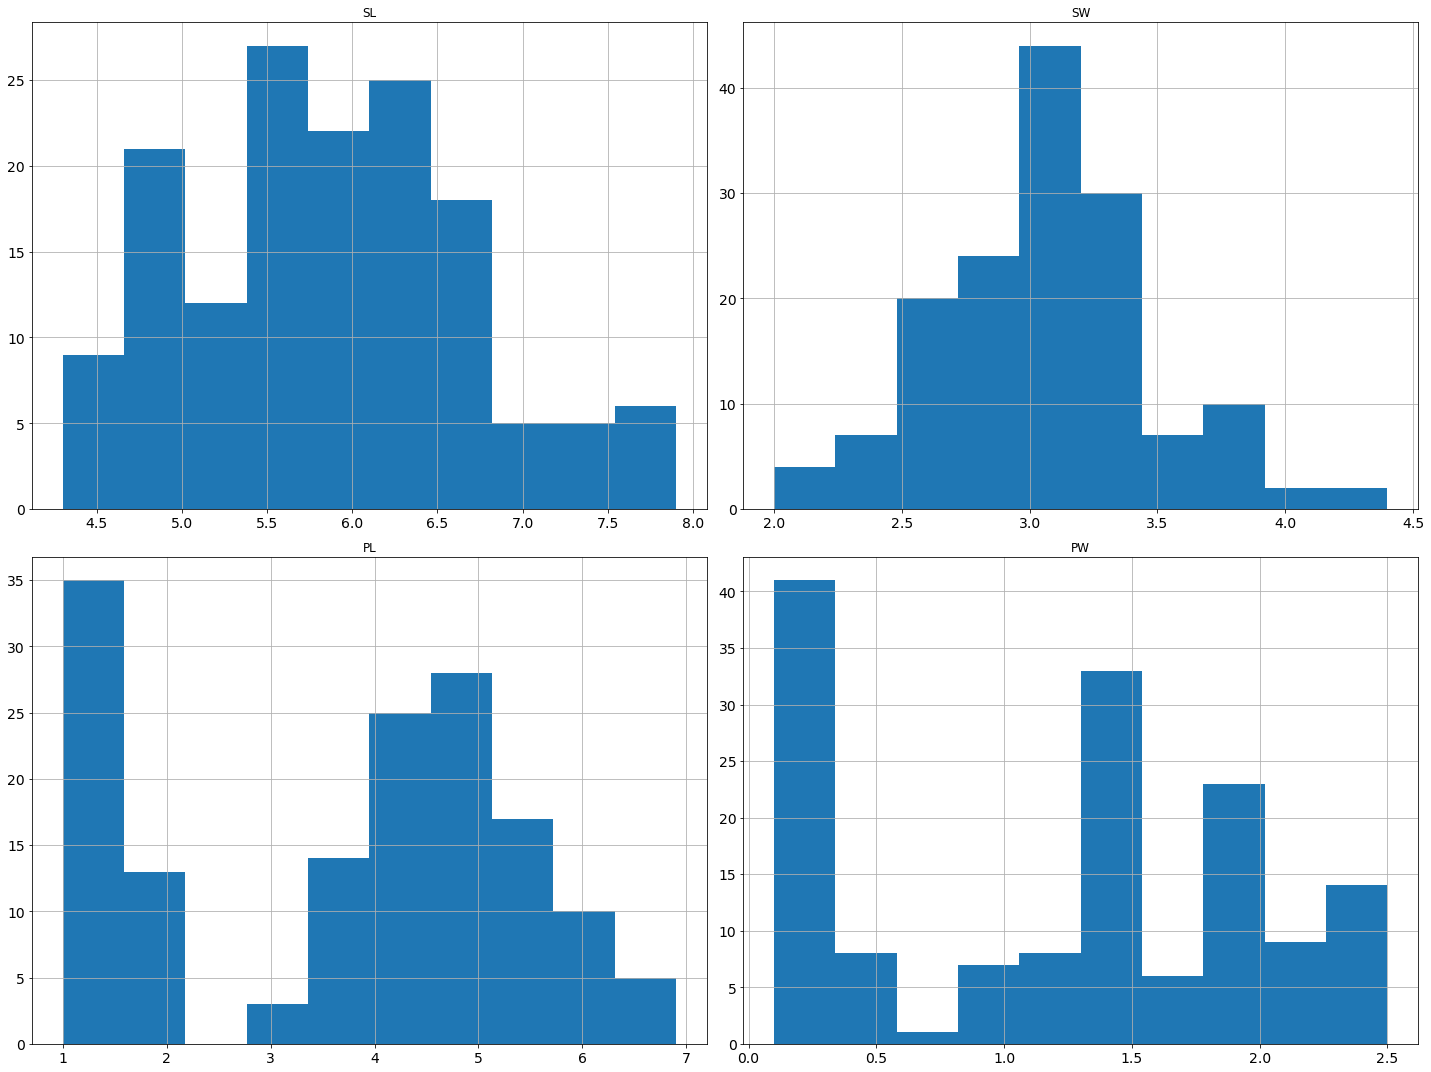

In [24]:
plt.Figure()
freq_graph = iris_df.select_dtypes(include=['float'])
graph = freq_graph.hist(figsize=(20, 15), xlabelsize=14, ylabelsize=14)
plt.tight_layout()
plt.show()

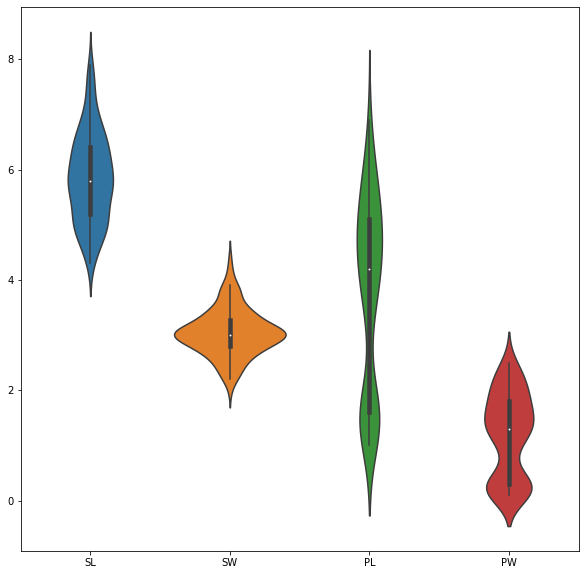

In [25]:
plt.figure(figsize=(10,10))
sns.violinplot(data=iris_df)
plt.show()

<Figure size 720x720 with 0 Axes>

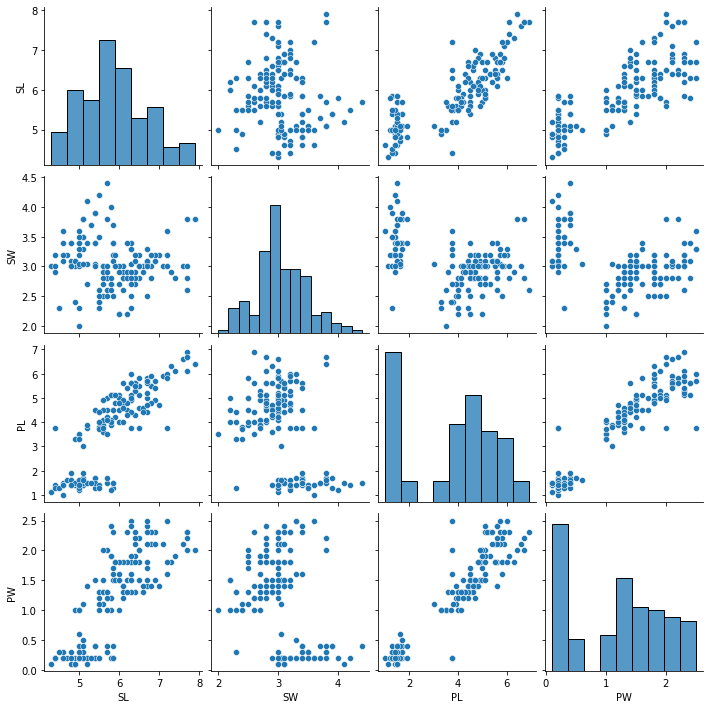

In [26]:
plt.figure(figsize=(10, 10))
sns.pairplot(data=iris_df)
plt.show()

## 2. Classification
<hr>

Before creating the model, let's split the dataset into train and test datasets.

In [31]:
# splitting target variable and independent variables
X = iris_df.drop(['Classification'], axis=1)
y = iris_df['Classification']

In [32]:
# splitting into train-test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

### 2.1 Logistic Regression
<hr>

In [33]:
from sklearn.linear_model import LogisticRegression

# creating Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(f'Test Accuracy: {round(lr.score(X_test, y_test) * 100, 2)}%')

Test Accuracy: 100.0%


In [34]:
# predicting
y_pred_lr = lr.predict(X_test)
print(f'Logistic Regression Classifier Report: \n\n{classification_report(y_test, y_pred_lr)}')

Logistic Regression Classifier Report: 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### 2.2 KNN Classifier
<hr>

In [40]:
from sklearn.neighbors import KNeighborsClassifier

best_Kvalue = 0
best_score = 0

# Checking the best k value for knn
for i in range(2,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 9
Test Accuracy: 95.0%


In [45]:
# Creating knn classifier with best K value
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

# predicting for X_test
y_pred_knn = knn.predict(X_test)

# generating classification report
print(f'KNN Classifier report: \n\n {classification_report(y_test, y_pred_knn)}')

KNN Classifier report: 

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



For KNN we got an accuracy of 97%.

### 2.3 SVM Classifier

In [52]:
from sklearn.svm import SVC

# creating SVM classifier
svm = SVC()
svm.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [53]:
# predicting for X_test using svm classifier
y_pred_svm = svm.predict(X_test)

# generating classifier report
print(f'SVM Classifier Report: \n\n{classification_report(y_test, y_pred_svm)}')

SVM Classifier Report: 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [51]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### 2.4 Decision Tree
<hr>

In [54]:
from sklearn.tree import DecisionTreeClassifier

# creating Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [55]:
# predicting for X_test
y_pred_dt = dt.predict(X_test)

# generating classifier report
print(f'Decision Tree Classifier Report: \n\n{classification_report(y_test, y_pred_dt)}')

Decision Tree Classifier Report: 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### 2.5 Random Forest Classifier
<hr>

In [56]:
from sklearn.ensemble import RandomForestClassifier

# creating random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(f'Test Accuracy: {round(rf.score(X_test, y_test)*100, 2)}%')

Test Accuracy: 100.0%


In [57]:
# predicting for x_test using random forest
y_pred_rf = rf.predict(X_test)
print(f'Random Forest Classifier Report: \n\n{classification_report(y_test, y_pred_rf)}')

Random Forest Classifier Report: 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Conclusion
<hr>

We got 100% accuracy for linear SVM, Decisin Tree and Random Forest Classifier.